<a href="https://colab.research.google.com/github/dany-tomlinson28/Inferencial/blob/main/PROYECTO_UNIDAD3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

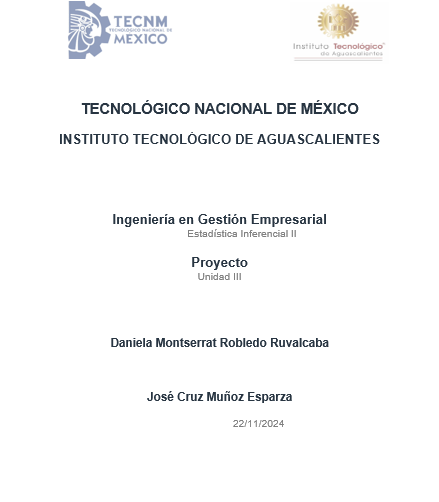

**INTRODUCCIÓN**

El analisis de datos ha demostrado ser una herramienta fundamental para entender el comportamiento del mercado y la interacción entre las marcas. Coca-Cola y McDonald's son dos de las marcas más icónicas del mundo, cuya relación comercial trasciende décadas. Coca-Cola, fundada en 1886, es conocida por ser la marca de bebidas más reconocida globalmente, mientras que McDonald's, creada en 1940, se ha convertido en el mayor referente de comida rápida. Estas empresas no solo comparten un liderazgo en sus respectivos sectores, sino también una colaboración histórica, ya que Coca-Cola es el proveedor oficial de bebidas en la mayoría de los restaurantes McDonald's a nivel mundial.

El presente proyecto tiene como objetivo realizar un análisis de series de tiempo de ambas marcas utilizando datos históricos relevantes. Por un lado, se estudiará de manera independiente el comportamiento de cada una, y por otro, se evaluará la relación entre ambas marcas, buscando identificar correlaciones o interdependencias que expliquen su éxito conjunto.

Para ello, se emplearán herramientas de Python como Pandas, Matplotlib y modelos de series de tiempo como series de Fourier, con el fin de obtener una comprensión más profunda de su dinámica en el mercado.

**MARCO TEORICO**

**Análisis de Series de Tiempo**

El análisis de series de tiempo es una técnica estadística que se utiliza para analizar conjuntos de datos que se recopilan en intervalos de tiempo regulares. Este tipo de análisis permite identificar tres componentes principales:

*Tendencia:* Describe el movimiento general de los datos a lo largo del tiempo, como el crecimiento sostenido de las ventas de una empresa.

*Estacionalidad:* Representa fluctuaciones periódicas causadas por factores como estaciones del año, festividades o cambios en el comportamiento del consumidor.

*Ruido:* Incluye las variaciones que no pueden explicarse por la tendencia o estacionalidad y que generalmente son impredecibles.

**Relación entre Coca-Cola y McDonald's**

Coca-Cola y McDonald's representan un caso clásico de colaboración empresarial. Desde que McDonald's adoptó a Coca-Cola como su proveedor exclusivo de bebidas, ambas marcas han trabajado juntas para fortalecer su presencia en el mercado.

Esta relación se basa en:

*Estrategias de marketing compartidas:* Ambas marcas a menudo colaboran en promociones y campañas publicitarias, como los famosos "combos" que incluyen una hamburguesa, papas fritas y una bebida Coca-Cola.

*Presencia global:* La expansión internacional de McDonald's ha contribuido al crecimiento de Coca-Cola en mercados emergentes, consolidando su liderazgo como la bebida preferida en restaurantes de comida rápida.

*Colaboracion de consumo:* Los datos sugieren que los consumidores asocian el consumo de alimentos de McDonald's con bebidas de Coca-Cola, lo que podría reflejarse en las tendencias de ambas marcas.

Analizar estas empresas desde la perspectiva de las series de tiempo puede revelar no solo patrones individuales, sino también dinámicas compartidas que expliquen cómo su relación impacta en sus ingresos, ventas o comportamientos bursátiles.


**Causalidad de Granger**

La causalidad de Granger es un test estadístico que comprueba si los resultados de una variable sirven para predecir la otra variable, y si tiene resultado unidireccional o bidireccional. Para ello, se tiene que comparar y deducir si el comportamiento actual y pasado de una serie temporal A predice la conducta de otra serie temporal B. Si esto ocurre, se puede afirmar que A causa B, y el comportamiento es unidireccional. Si de la misma manera B ayuda en la predicción de A, la causalidad es bidireccional, afirmando que A causa B y B causa A.

**Modelo Prophet**

Consiste en “un procedimiento para pronosticar datos de series de tiempo basado en un modelo aditivo en el que las tendencias no lineales se ajustan a la estacionalidad anual, semanal y diaria, más los efectos de las vacaciones. Funciona mejor con series de tiempo que tienen fuertes efectos estacionales y varias temporadas de datos históricos. Prophet es robusto ante los datos faltantes y los cambios en la tendencia, y por lo general maneja bien los valores atípicos.”


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
from prophet import Prophet
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import ttest_rel
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
from numpy.polynomial.polynomial import Polynomial
from statsmodels.tsa.stattools import adfuller

In [ ]:

warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers=['COKE', 'MCD'],
    start='2018-01-01',        # Fecha de inicio
    end='2023-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )
df = df.reset_index()

df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  2 of 2 completed


,MCD_Open,MCD_High,MCD_Low,MCD_Close,MCD_Adj Close,MCD_Volume,COKE_Open,COKE_High,COKE_Low,COKE_Close,COKE_Adj Close,COKE_Volume
Date,,,,,,,,,,,,
2018-01-02,173.729996,174.479996,172.660004,173.220001,147.811935,3696900,214.000000,216.119995,210.210007,211.279999,200.898666,64200
2018-01-03,173.229996,173.639999,172.000000,172.490005,147.188995,3789600,211.000000,211.899994,208.000000,209.000000,198.730667,42100
2018-01-04,173.240005,174.130005,172.729996,173.699997,148.221512,2756400,209.000000,211.500000,205.009995,205.509995,195.412155,56100
2018-01-05,174.000000,175.000000,173.399994,174.050003,148.520187,3737700,206.000000,206.110001,200.509995,202.000000,192.074615,53900
2018-01-08,173.740005,174.210007,172.929993,173.929993,148.417770,2060800,202.000000,209.470001,200.750000,208.949997,198.683105,59900
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,265.899994,268.350006,264.790009,267.570007,256.992523,1269000,518.380005,524.919983,513.070007,522.809998,506.585175,15500
2022-12-27,268.660004,268.869995,266.600006,266.839996,256.291351,1674700,527.580017,530.200012,515.820007,518.289978,502.205536,25000
2022-12-28,268.000000,268.140015,265.070007,265.109985,254.629715,1427800,516.609985,522.000000,509.049988,509.049988,493.252228,28600


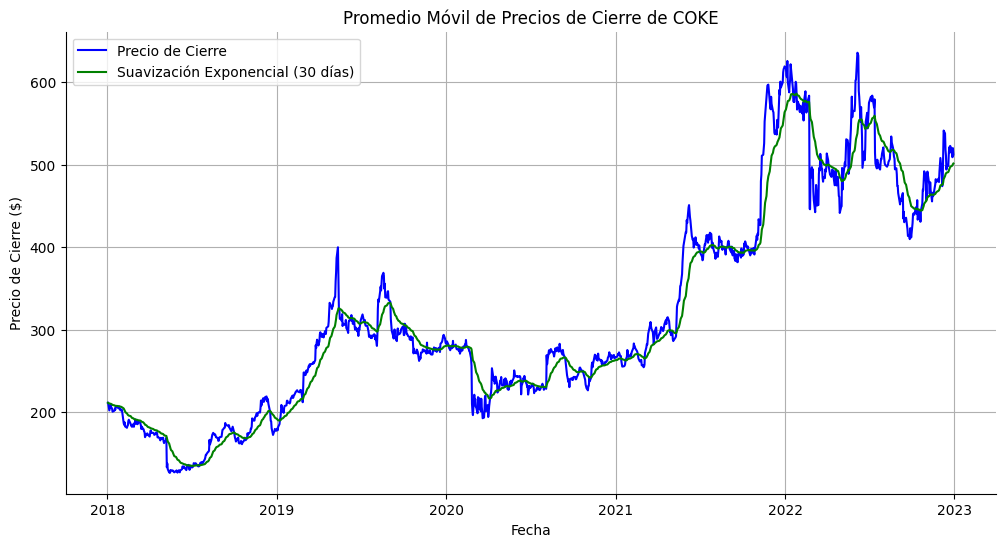

In [ ]:
# Promedio Móvil Exponencial
ventana_ses = 30
df['SES'] = df['COKE_Close'].ewm(span=ventana_ses, adjust=False).mean() #Se entiende mas la exponencial

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['COKE_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Promedio Móvil de Precios de Cierre de COKE')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**Hipotesis Nula:** La serie no es estacionaria

**Hipotesis alternativa:** La serie es estacionaria

In [ ]:
#Prueba de estacionariedad con ADF
nivel_de_significancia= 0.05
adf_test= adfuller(df['COKE_Close'].dropna()) #TIRAR VALORES QUE SE VAN ELIMINANDO
print('Estadistico ADF:', adf_test[0])
print('p-Value:', adf_test[1])
if adf_test[1] <= nivel_de_significancia:
  print('La serie es estacionaria (rechazamos la hipotesis nula)')
else:
  print('La serie no es estacionaria (aceptamos la hipotesis nula)')


Estadistico ADF: -0.874129370144631
p-Value: 0.796372574836655
La serie no es estacionaria (aceptamos la hipotesis nula)


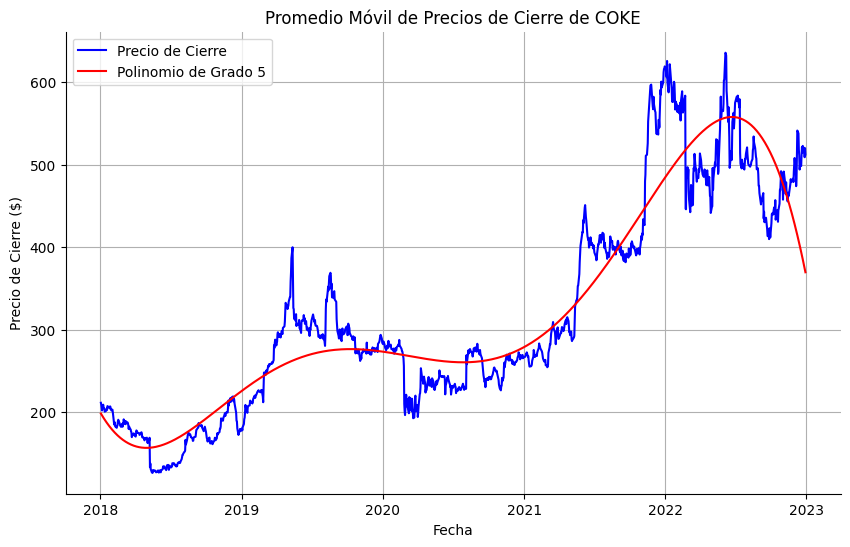

In [ ]:
#Convertir fechas numeros
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)
x= df['Date']
y= df ['COKE_Close']
#Ajustar un modelo polinómico
#Regresión polinomial
grado= 5
modelo= Polynomial.fit(df['Date'], df['COKE_Close'], deg = grado)
df['Poly_trend']= modelo(df['Date'])
df['Poly_resid']= df['COKE_Close']- df['Poly_trend']
#Graficar
plt.figure(figsize=(10, 6))
plt.plot(df['COKE_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['Poly_trend'], label=f'Polinomio de Grado {grado}', color='red')
plt.title('Promedio Móvil de Precios de Cierre de COKE')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

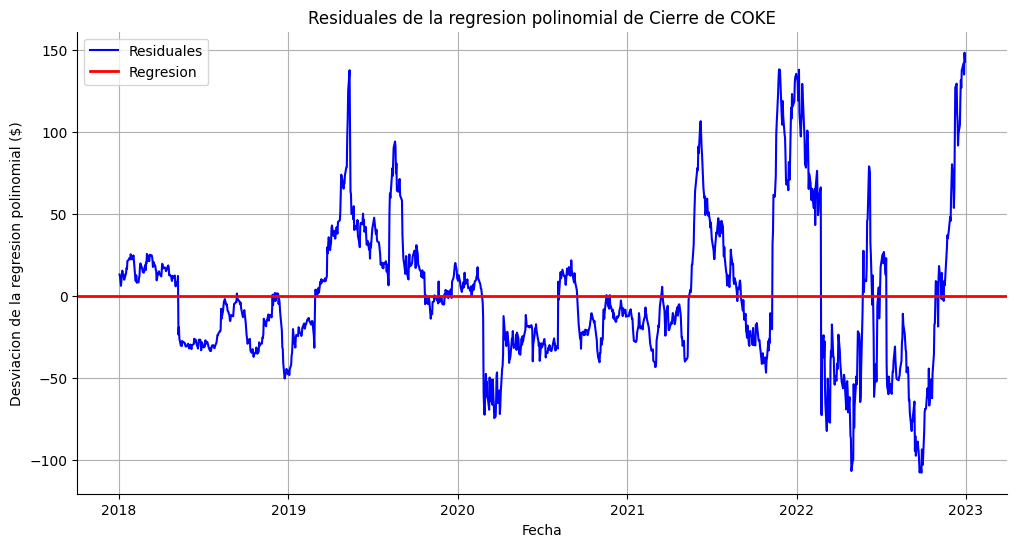

In [ ]:
#Graficar residuales
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_resid'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='solid', linewidth=2)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de COKE')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  #
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia      magnitud  longitud_de_onda
0    0.003177  15867.341104        314.750000
1    0.007943  12591.440313        125.900000
2    0.008737  12291.301497        114.454545
3    0.001589  12272.258965        629.500000
4    0.002383  11298.328041        419.666667


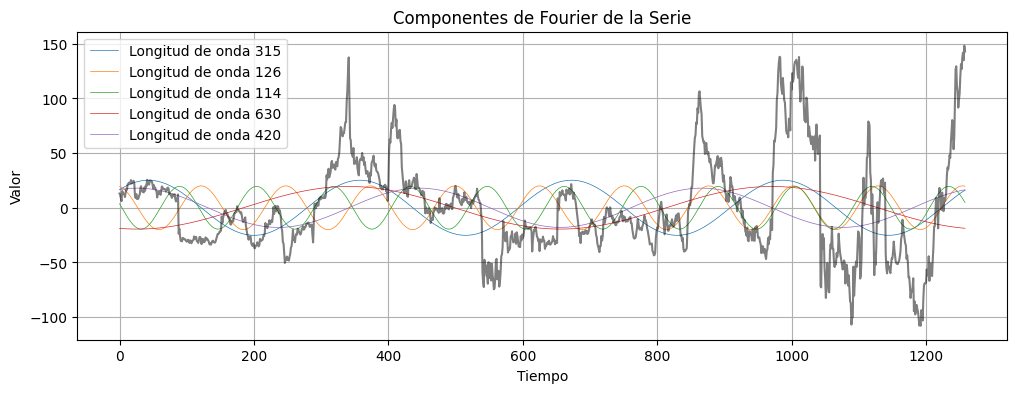

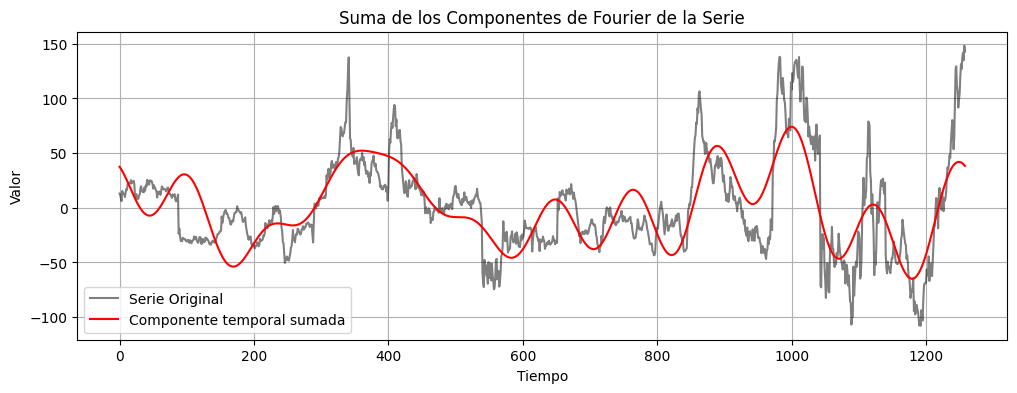

In [ ]:
serie = df['Poly_resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado


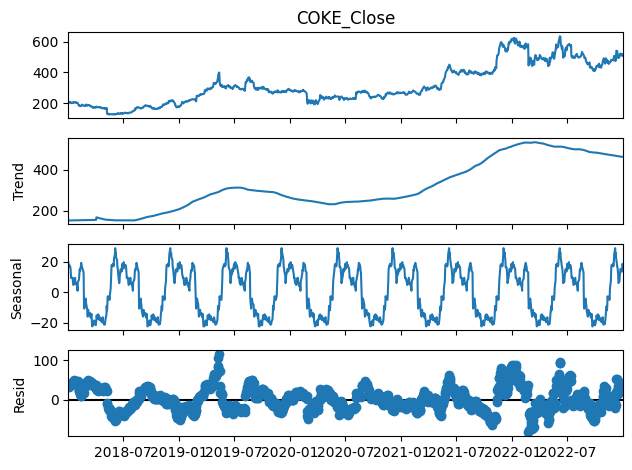

In [ ]:
descomposicion= sm.tsa.seasonal_decompose(
df['COKE_Close'],
model= 'additive',
period= 126, #estacionaridad dominante
extrapolate_trend='freq' # Reemplazar estrapolate_trend=0 por extrapolate_trend='freq'
) #252 dias de negociacion al año
#Graficar
fig= descomposicion.plot()
plt.show()

In [ ]:
# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")


Estadístico t: 0.028716603487795672
Valor p: 0.9770951689486451


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


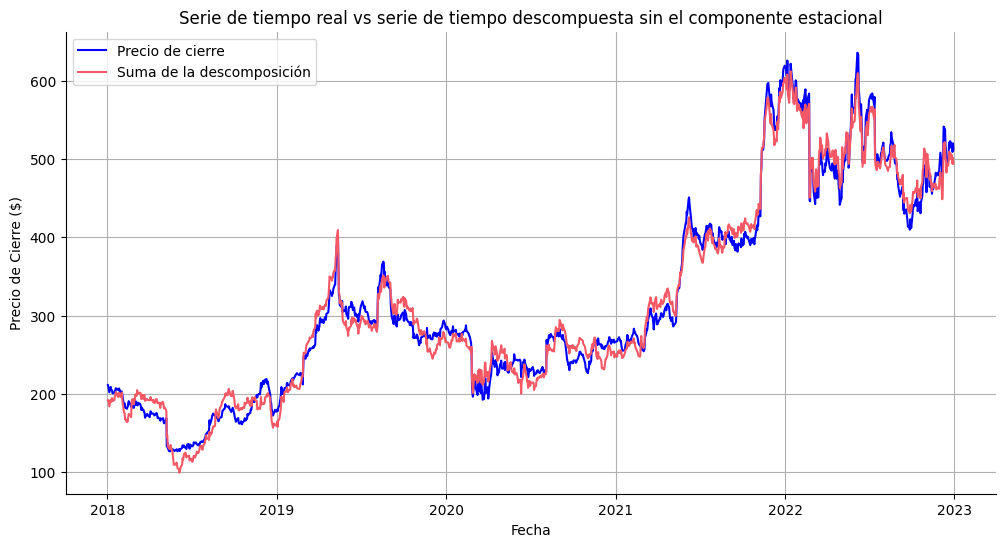

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['COKE_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='#F45865')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

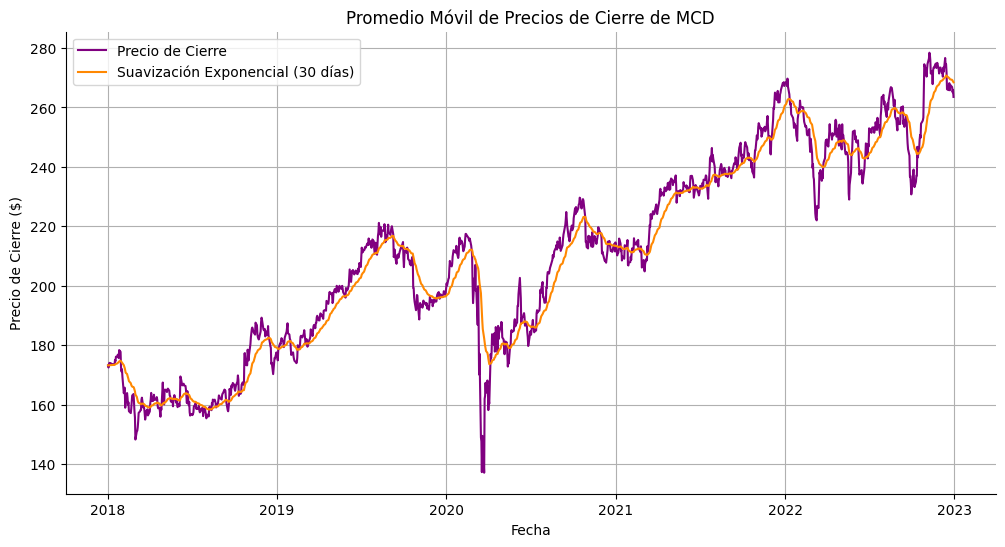

In [ ]:
# Promedio Móvil Exponencial
ventana_ses = 30
df['SES'] = df['MCD_Close'].ewm(span=ventana_ses, adjust=False).mean() #Se entiende mas la exponencial

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['MCD_Close'], label='Precio de Cierre', color='purple')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='#FF8801')
plt.title('Promedio Móvil de Precios de Cierre de MCD')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**Hipotesis Nula:** La serie no es estacionaria

**Hipotesis alternativa:** La serie es estacionaria

In [ ]:
#Prueba de estacionariedad con ADF
nivel_de_significancia= 0.05
adf_test= adfuller(df['MCD_Close'].dropna()) #TIRAR VALORES QUE SE VAN ELIMINANDO
print('Estadistico ADF:', adf_test[0])
print('p-Value:', adf_test[1])
if adf_test[1] <= nivel_de_significancia:
  print('La serie es estacionaria (rechazamos la hipotesis nula)')
else:
  print('La serie no es estacionaria (aceptamos la hipotesis nula)')


Estadistico ADF: -1.2377978116194486
p-Value: 0.6571284640386629
La serie no es estacionaria (aceptamos la hipotesis nula)


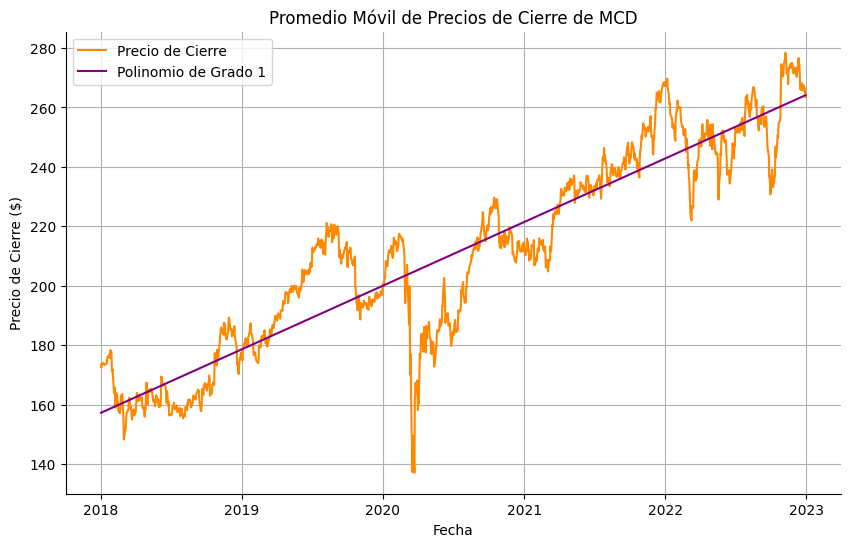

In [ ]:
#Convertir fechas numeros
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)
x= df['Date']
y= df ['MCD_Close']
#Ajustar un modelo polinómico
#Regresión polinomial
grado= 1

modelo= Polynomial.fit(df['Date'], df['MCD_Close'], deg = grado)
df['Poly_trend']= modelo(df['Date'])
df['Poly_resid']= df['MCD_Close']- df['Poly_trend']
#Graficar
plt.figure(figsize=(10, 6))
plt.plot(df['MCD_Close'], label='Precio de Cierre', color='#FF8801')
plt.plot(df['Poly_trend'], label=f'Polinomio de Grado {grado}', color='purple')
plt.title('Promedio Móvil de Precios de Cierre de MCD')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

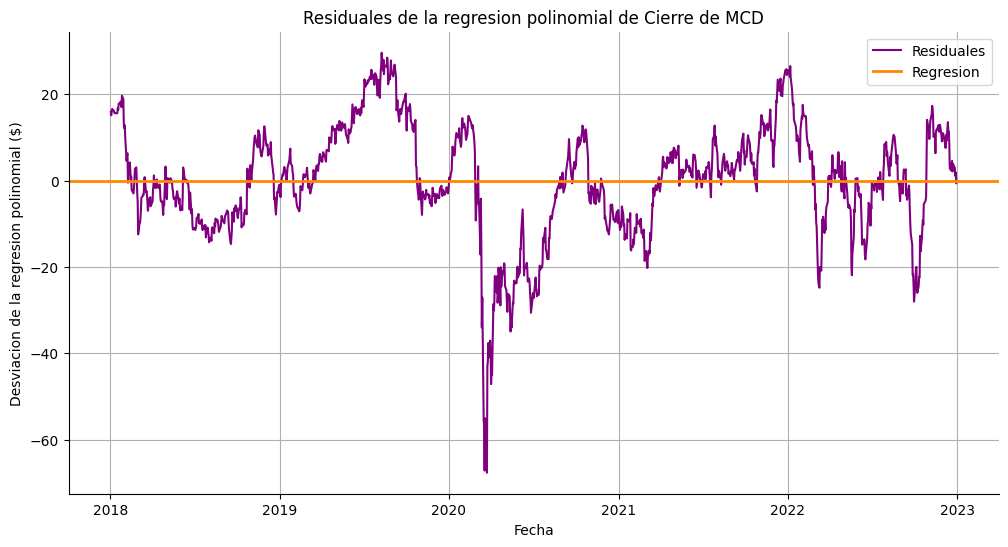

In [ ]:
#Graficar residuales
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_resid'], label='Residuales', color='purple')
plt.axhline(0, color='#FF8801', label='Regresion',linestyle='solid', linewidth=2)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de MCD')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia     magnitud  longitud_de_onda
0    0.001589  5489.909910        629.500000
1    0.002383  4081.369960        419.666667
2    0.003177  3652.927739        314.750000
3    0.006354  3277.255241        157.375000
4    0.003971  3038.000130        251.800000


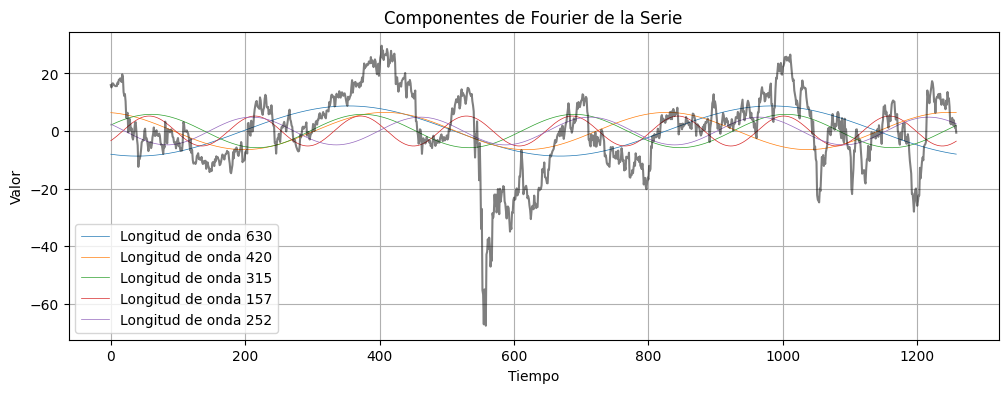

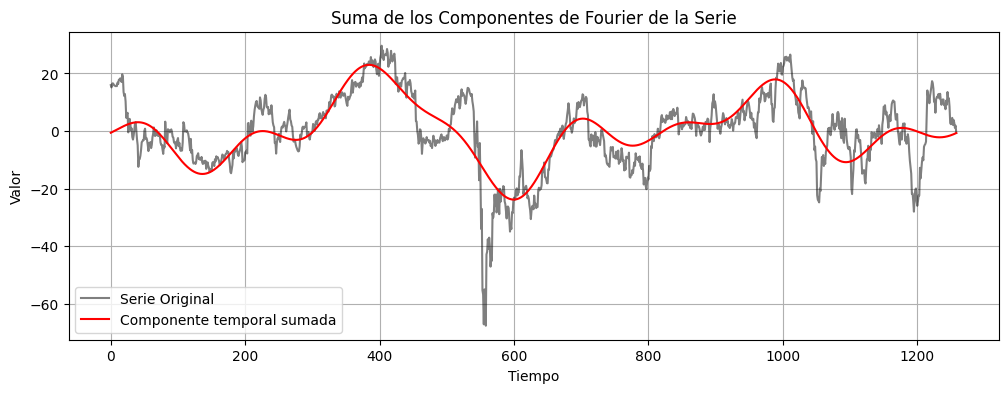

In [ ]:
serie = df['Poly_resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado


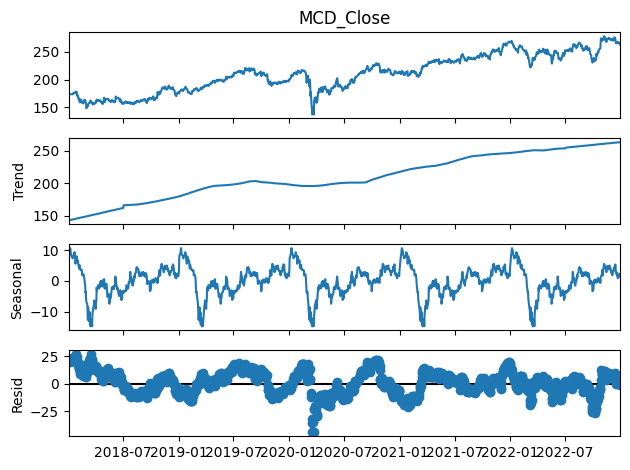

In [ ]:
descomposicion= sm.tsa.seasonal_decompose(
df['MCD_Close'],
model= 'additive',
period= 252,
extrapolate_trend='freq' # Reemplazar estrapolate_trend=0 por extrapolate_trend='freq'
) #252 dias de negociacion al año
#Graficar
fig= descomposicion.plot()
plt.show()

In [ ]:
nivel_de_significancia = 0.05
tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estadístico t:" , {t_stat})
print("Valor p:", {p_valor})
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")

Estadístico t: {0.019960199369634817}
Valor p: {0.9840782877834388}


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


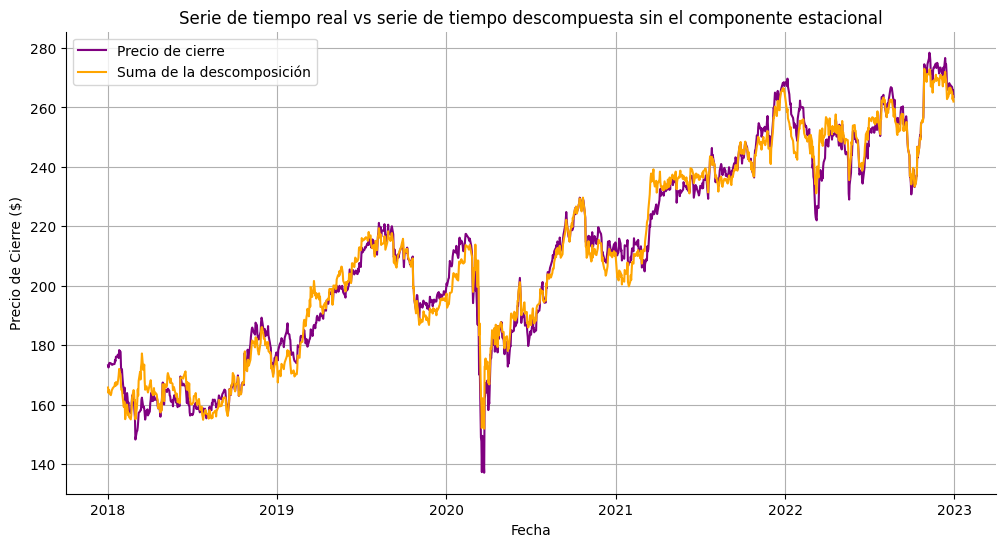

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['MCD_Close'], label='Precio de cierre', color='purple')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='orange')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
# Aquí no le muevan a nada
# Básicamente, lo que se hace este bloque es crear la función
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.
# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.
# Definir el número máximo de rezagos para la prueba
max_lags = 5
# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['COKE_Close', 'MCD_Close']], max_lags, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5515  , p=0.1104  , df_denom=1255, df_num=1
ssr based chi2 test:   chi2=2.5576  , p=0.1098  , df=1
likelihood ratio test: chi2=2.5550  , p=0.1099  , df=1
parameter F test:         F=2.5515  , p=0.1104  , df_denom=1255, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9940  , p=0.0504  , df_denom=1252, df_num=2
ssr based chi2 test:   chi2=6.0119  , p=0.0495  , df=2
likelihood ratio test: chi2=5.9975  , p=0.0498  , df=2
parameter F test:         F=2.9940  , p=0.0504  , df_denom=1252, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0091  , p=0.1109  , df_denom=1249, df_num=3
ssr based chi2 test:   chi2=6.0610  , p=0.1087  , df=3
likelihood ratio test: chi2=6.0464  , p=0.1094  , df=3
parameter F test:         F=2.0091  , p=0.1109  , df_denom=1249, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4222  , p=0.

In [ ]:
!pip install prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4chqnv1o/71o3_xcc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4chqnv1o/okprc_so.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9041', 'data', 'file=/tmp/tmp4chqnv1o/71o3_xcc.json', 'init=/tmp/tmp4chqnv1o/okprc_so.json', 'output', 'file=/tmp/tmp4chqnv1o/prophet_modelcugvvarr/prophet_model-20241122214532.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:45:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:45:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


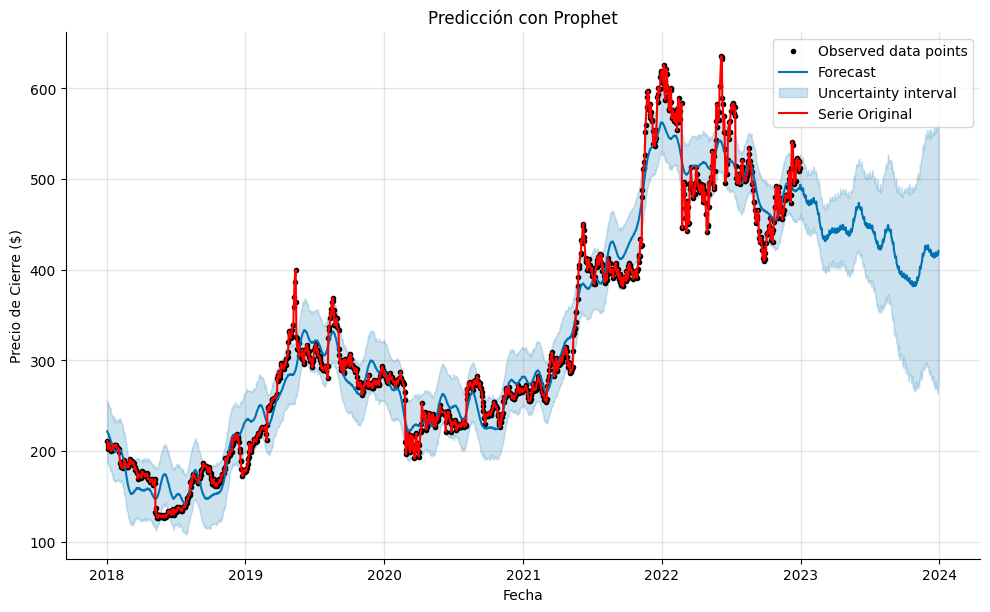

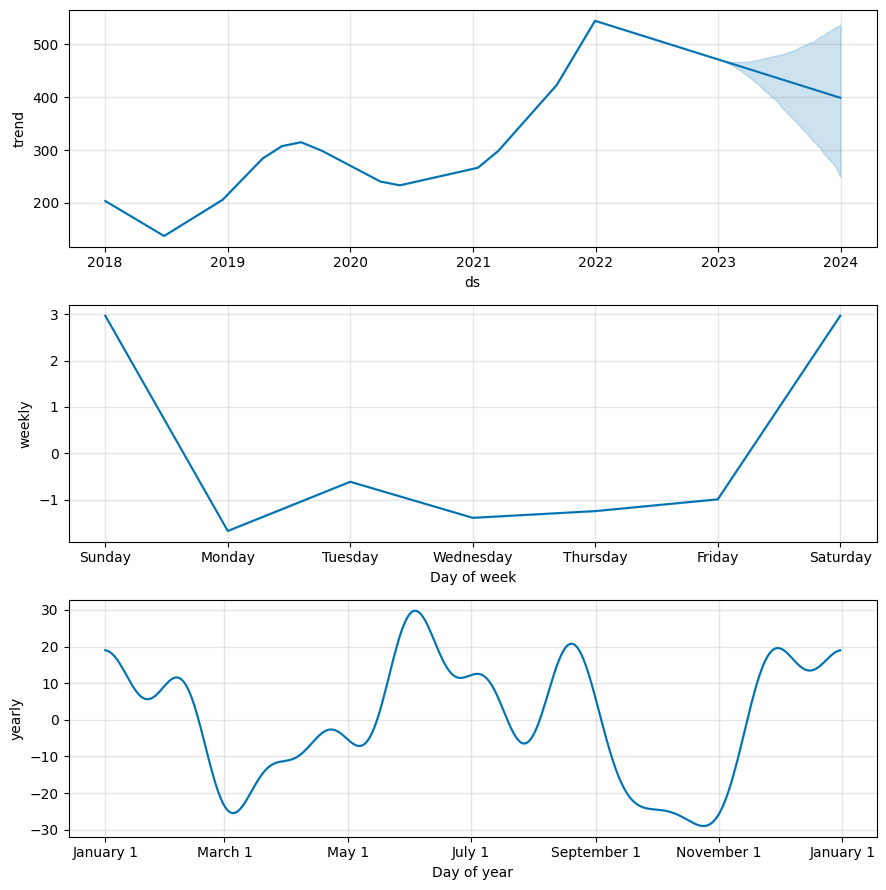

In [ ]:

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df[['COKE_Close']].reset_index().rename(columns={'Date': 'ds', 'COKE_Close': 'y'}))
# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df['COKE_Close'], label='Serie Original', color='red') # Changed df2 to df
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)


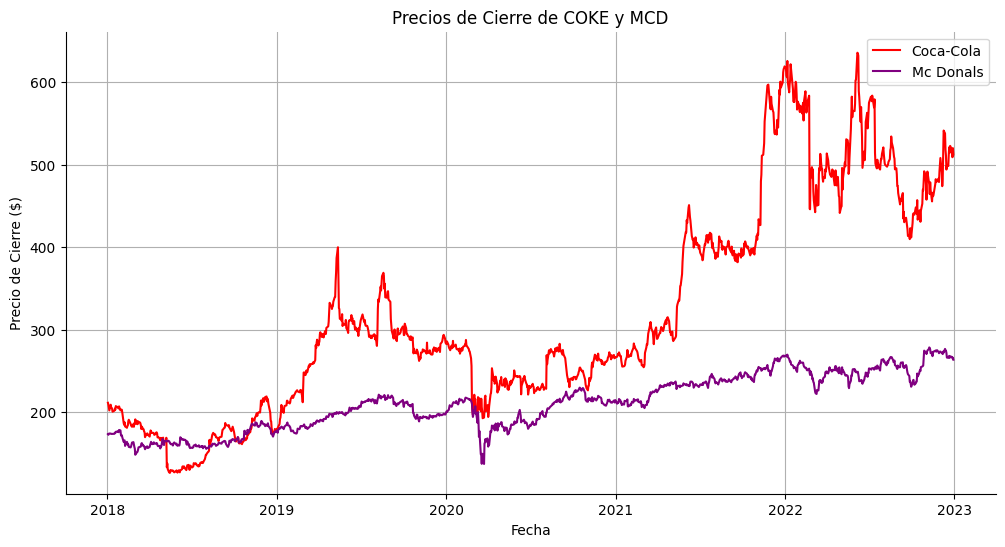

In [ ]:
# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['COKE_Close'], label='Coca-Cola', color='red')
plt.plot(df['MCD_Close'], label='Mc Donals', color='purple')
plt.title('Precios de Cierre de COKE y MCD')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**Resultados**

Se decidió hacer analisis de tiempo de ambas marcas de manera independiente y al final utilizar la serie de Granger y el modelo Prophet.

*Coca-Cola:* Al realizar graficar la serie de tiempo a 5 años y el SES podemos observar que no hay un patron en la serie y tiene muchas altas y bajas, se observa que a principos de 2019 comienza un alza después de tener un precio de cierre muy bajo, sin embargo, después del 2020 este precio baja muy considerablemente para recuperarse  después de iniciar el año 2021, se realizó una prueba ADF con un nivel de significancia del 0.05, obteniendo como resultado un valor p de 0.80, es decir aceptamos la hipotesis nula, la serie no es estacionaria.

Como paso siguiente, se realiza la regresión polinomial, eligiendo un grado 5 con la intención de observar mejor la serie sin necesidad de tener una alza en el ruido como parte de lo siguiente es graficar los residuales del polinomio, sin embargo se observa que aunque una cantidad considerable se acerca a 0, existen picos considerables de forma no esporadica.

Con el fin de intentar observar una estacionalidad significativa utilizamos series de Fourier con el que las ondas logran que se tenga un mejor entendimiento, al contar con una curva de longitud 126 (medio año de negociación) se utiliza dicho periodo a la hora de graficar la descomposicion, en la cual es importante destacar que los residuales parecen ser ruido blanco.

Por último se realiza prueba t pareada para saber si existe un efecto significativo, lo cual se rechaza y se comprueba con la grafica donde se comparan ambas series de tiempo sin el componente estacional.




*Mc Donal's:* Al realizar graficar la serie de tiempo a 5 años y el SES podemos observar que no hay un patron en la serie y tiene muchas altas y bajas, se observa que a principos de 2019 comienza a crecer, sin embargo, después del 2020 este precio baja muy considerablemente incluso mas que en Coca-Cola para recuperarse considerablemente rápido, se realizó una prueba ADF con un nivel de significancia del 0.05, obteniendo como resultado un valor p de 0.66, es decir aceptamos la hipotesis nula, la serie no es estacionaria.

Como paso siguiente, se realiza la regresión polinimial, eligiendo un grado 1 con la intención de observar mejor la serie sin necesidad de tener una alza en el ruido ya que esta serie ya es lo suficientemente inestable,  como parte de lo siguiente es graficar los residuales del polinomio, y se logra observar que existe una candidad considerable se acerca a 0, aunque existen picos estos no tienen un tamaño tan considerable comparado con el de la marca antes analizada.

Con el fin de intentar observar una estacionalidad significativa utilizamos series de Fourier con el que las ondas logran que se tenga un mejor entendimiento, al contar con una curva de longitud 252(un año de negociación) se utiliza dicho periodo a la hora de graficar la descomposicion, en la cual es importante destacar que los residuales parecen ser ruido blanco.

Por último se realizó  prueba t pareada para saber si existe un efecto significativo, lo cual se rechaza y se comprueba con la grafica donde se comparan ambas series de tiempo sin el componente estacional.

Como penultimo paso se realiza una prueba de causalidad de Granger para responder si los datos de la serie de tiempo  de Coca-Cola pueden predecir los datos de la serie de tiempo de McDonald's, o viceversa. Después de evaluar hasta 5 rezagos podemos inferir no hay suficiente evidencia para decir que los datos de Coca-Cola causan cambios en los datos de McDonald's (o viceversa) en ninguno de los rezagos evaluados.

Por último paso en Prophet se uso para tener una idea general de cómo podrían comportarse los precios de Coca-Cola en el futuro. Si se realizara con los datos de McDonald's, seríafactible compararlos para ver si ambas marcas tienen patrones similares en sus precios.

**CONCLUSIÓN**

El análisis demuestra que ambas marcas experimentaron fluctuaciones significativas durante el período evaluado, probablemente influenciadas por factores económicos y globales (probablemente pandemia). Aunque no se identificaron relaciones causales directas entre las series, este ejercicio destaca la utilidad de las herramientas utilizadas (como pruebas ADF, Fourier, y Prophet) para analizar series de tiempo complejas.

Si bien los comportamientos de las marcas tienen similitudes en términos de caídas y recuperaciones, los datos sugieren que sus dinámicas son independientes. Esto resalta la importancia de evaluar factores externos específicos que podrían estar influyendo en cada una de ellas.

